In this notebook we test Restricted Boltzmann Machines for Honeycomb Heisenberg model

Honeycomb 3x3 has 18 spins and is numerically solvable. We test for 3x3 and then try to approximate for 5x5 honeycomb, which has 50 spins

In [1]:
import jax.numpy as jnp
import jax
import netket as nk
import json
import matplotlib.pyplot as plt
from time import time
from pathlib import Path
from Models import RestrictedBoltzmannMachine

In [2]:
jax.devices()

[CudaDevice(id=0)]

In [24]:
read = False
res_path = Path('./Simulations/6-RBMComparison')
image_path = Path('./images/6-RBMComparison')
extent = [3, 3]
alpha_list = [0.75, 1, 2, 4, 7]
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 500
n_samples = 6 * 8 * 128
n_chains = 16

In [27]:
honey = nk.graph.Honeycomb(extent=extent, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
eval_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
eval_gs

-40.38866334601941

In [25]:
rbm_results0 = []
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains_per_rank=n_chains)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results0.append(rbm_result)
    else:
        rbm_results0.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 711.131 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 560.337 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 400.399 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 429.132 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 455.609 seconds


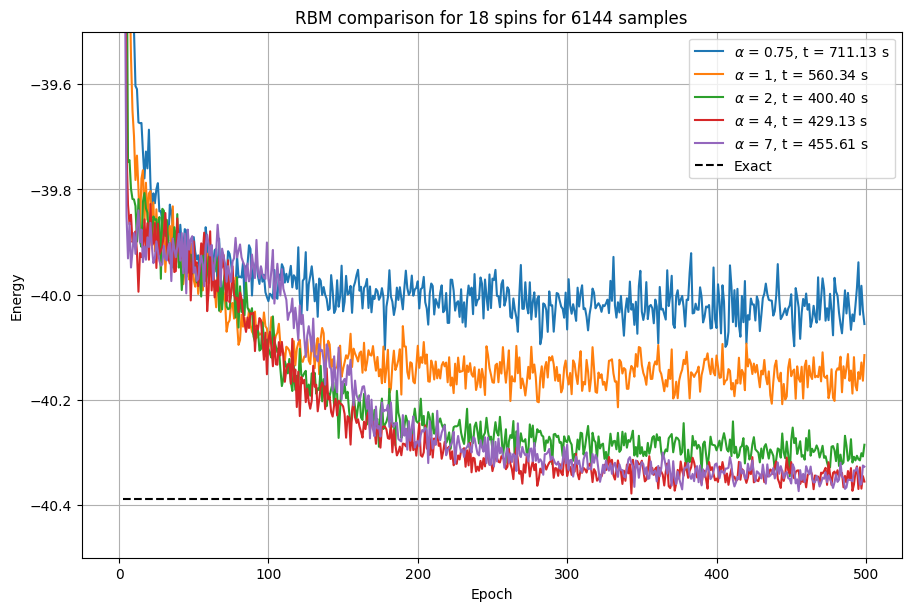

In [28]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results0, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'],# linewidth=0.8,
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95, 
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-40.5, -39.5],
         title=f'RBM comparison for {honey.n_nodes} spins for {n_samples} samples')
axes.legend()
axes.grid()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');

In [15]:
read = False
extent = [5, 5]
eval_gs = None
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 500
n_samples = 6 * 8 * 128
n_chains=16

In [16]:
rbm_results1 = []
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains=n_chains)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results1.append(rbm_result)
    else:
        rbm_results1.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1152.110 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1103.243 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1221.850 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1350.404 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1542.252 seconds


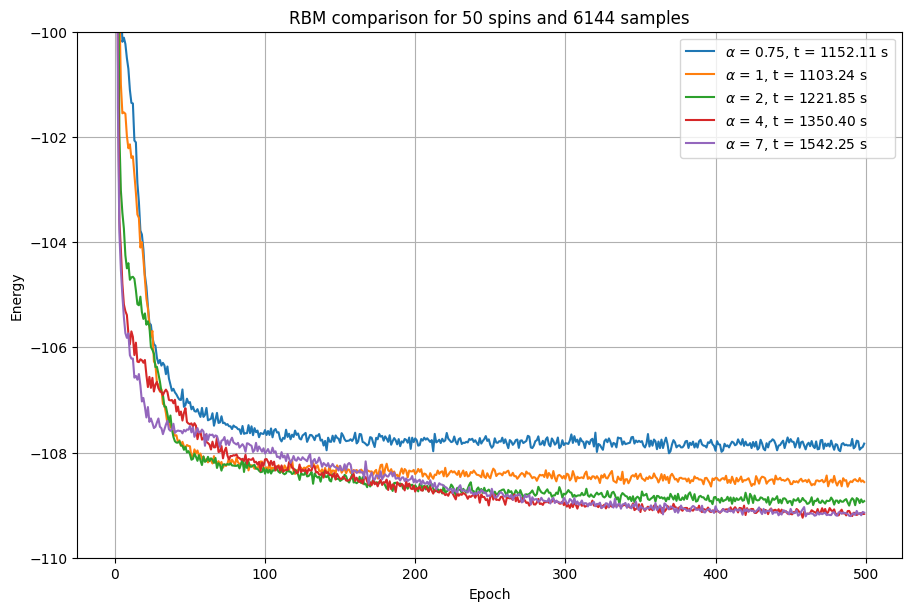

In [20]:
#890, 1128, 1949, 3614, 6000
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results1, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'],
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95,
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-110, -100],
         title=f'RBM comparison for {honey.n_nodes} spins and {n_samples} samples')
axes.legend()
axes.grid()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');